In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = [224, 224]

train_path = "/content/drive/My Drive/Covid_data/two/train"
valid_path = "/content/drive/My Drive/Covid_data/two/test"

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 2s 0us/step


In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [7]:
folders = glob("/content/drive/My Drive/Covid_data/two/test/*")

In [9]:
folders

['/content/drive/My Drive/Covid_data/two/test/normal',
 '/content/drive/My Drive/Covid_data/two/test/covid']

In [11]:
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory( "/content/drive/My Drive/Covid_data/two/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 130 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory("/content/drive/My Drive/Covid_data/two/test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 2 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
5/5 [==============================] - 78s 16s/step - loss: 4.0680 - accuracy: 0.5231 - val_loss: 5.7133 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 4s 859ms/step - loss: 3.2996 - accuracy: 0.4769 - val_loss: 1.2172 - val_accuracy: 0.5000
Epoch 3/50
5/5 [==============================] - 4s 890ms/step - loss: 1.7437 - accuracy: 0.5231 - val_loss: 0.5038 - val_accuracy: 0.8333
Epoch 4/50
5/5 [==============================] - 4s 856ms/step - loss: 0.6219 - accuracy: 0.6692 - val_loss: 1.4644 - val_accuracy: 0.5000
Epoch 5/50
5/5 [==============================] - 4s 844ms/step - loss: 0.4776 - accuracy: 0.7231 - val_loss: 0.6872 - val_accuracy: 0.5556
Epoch 6/50
5/5 [==============================] - 4s 885ms/step - loss: 0.8859 - accuracy: 0.6308 - val_loss: 0.8256 - val_accuracy: 0.5556
Epoch 7/50
5/5 [==============================] - 5s 1s/step - loss: 0.6094 - accurac

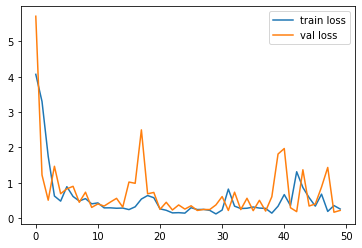

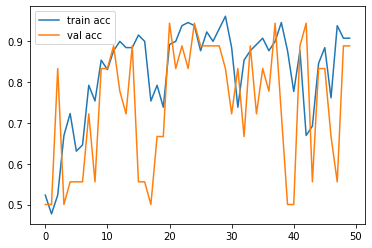

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')